In [2]:
import matplotlib.pyplot as plt
import json, os

In [3]:
os.chdir("/home/julius/PowerFolders/Masterarbeit/")

In [4]:
path = "./detections/personData200/06,04,2021-10,46/"

In [5]:
with open(path + "detections.json", "r+") as input_file:
    evaluation = json.load(input_file)

In [6]:
label_statistics = {}
for image in evaluation:
    if len(evaluation[image]["category_names"]) == 0:
        if "no_detection" not in label_statistics:
            label_statistics["no_detection"] = {"num": 1, "mean_probability": 0.00, "max_probability": 0.00, "min_probability": 0.00}
        else:
            label_statistics["no_detection"]["num"] += 1
    for count, element in enumerate(evaluation[image]["category_names"]):
        if element not in label_statistics:
            label_statistics[element] = {"num": 1, "mean_probability": evaluation[image]["prediction_scores"][count], "max_probability": evaluation[image]["prediction_scores"][count], "min_probability": evaluation[image]["prediction_scores"][count]}
        else:
            label_statistics[element]["num"] += 1
            label_statistics[element]["mean_probability"] += evaluation[image]["prediction_scores"][count]
            if label_statistics[element]["max_probability"] < evaluation[image]["prediction_scores"][count]:
                label_statistics[element]["max_probability"] = evaluation[image]["prediction_scores"][count]
            if label_statistics[element]["min_probability"] > evaluation[image]["prediction_scores"][count]:
                label_statistics[element]["min_probability"] = evaluation[image]["prediction_scores"][count]
for label in label_statistics:
    if label != "no_detection":
        label_statistics[label]["mean_probability"] = label_statistics[label]["mean_probability"]/label_statistics[label]["num"]

In [7]:
print(list(label_statistics[list(label_statistics.keys())[0]].keys()))

['num', 'mean_probability', 'max_probability', 'min_probability']


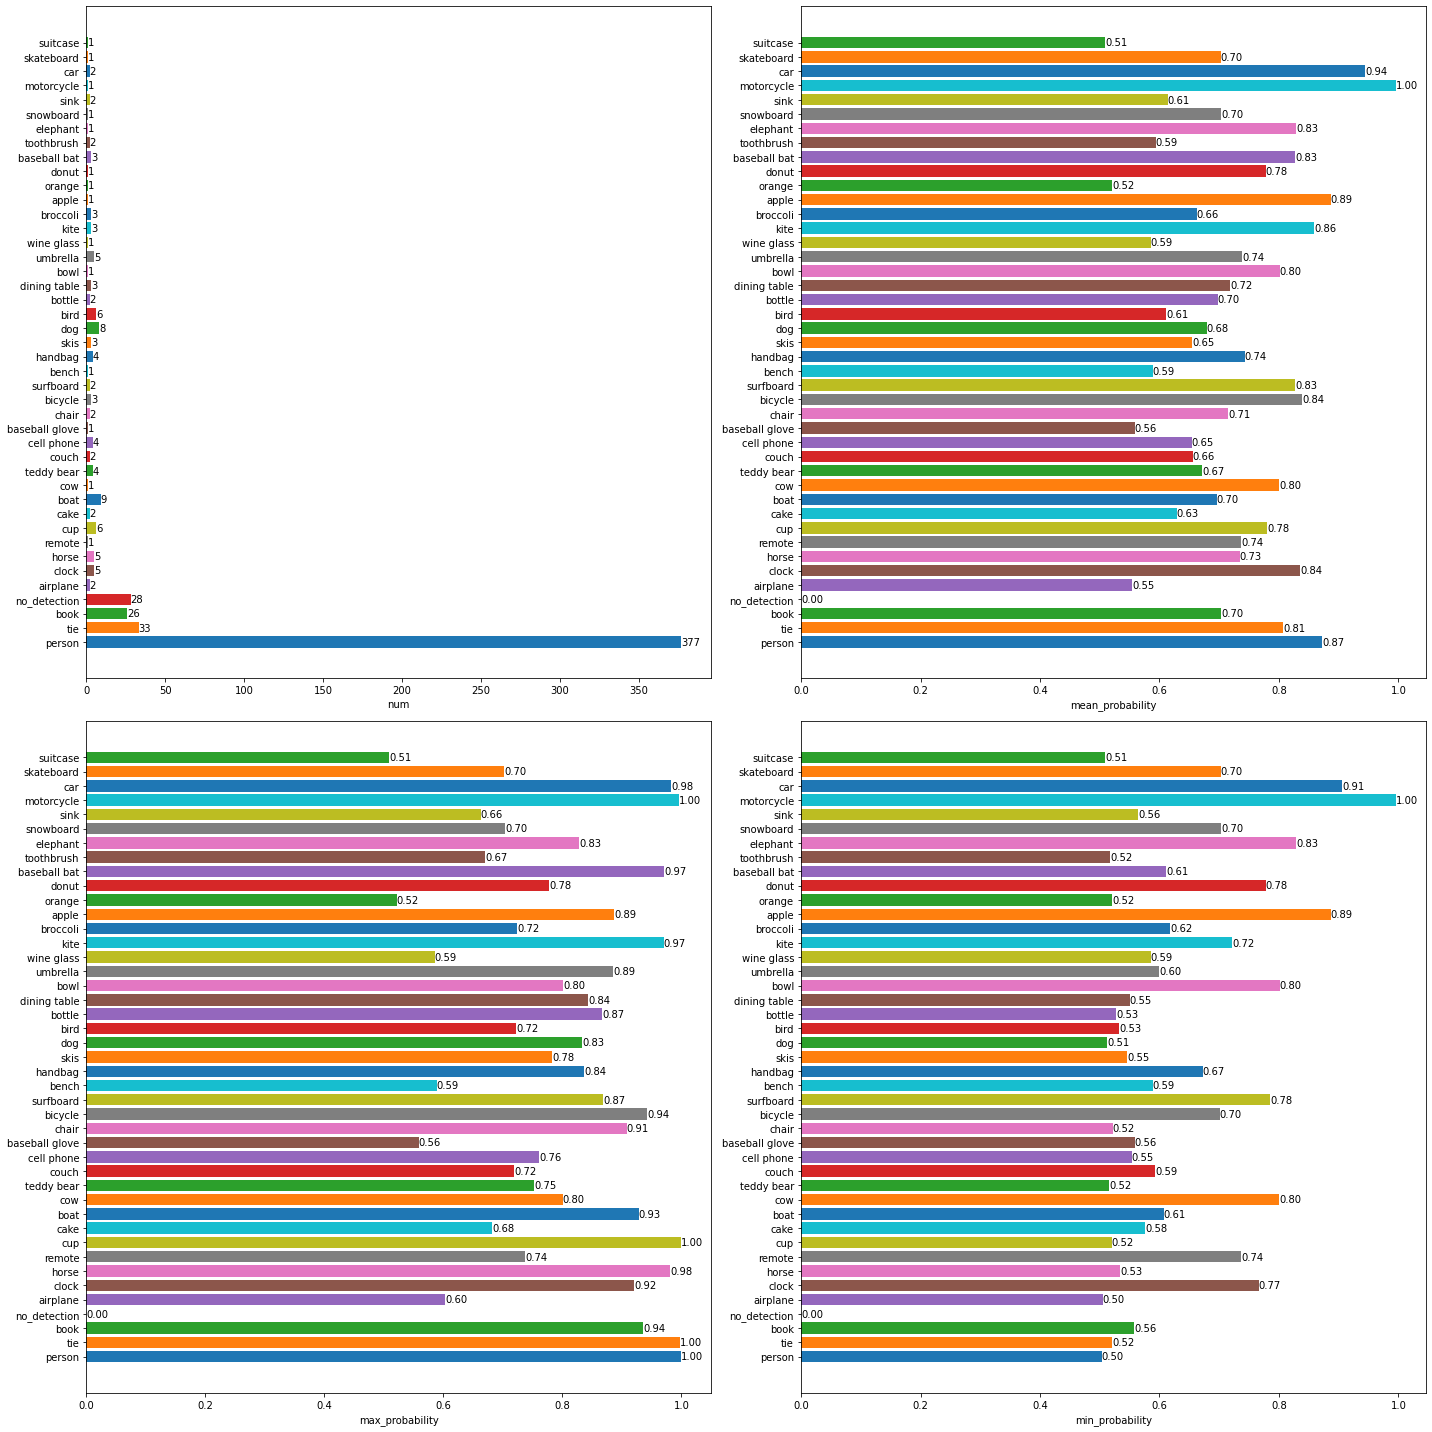

In [8]:

fig = plt.figure(figsize=(20, 20))
for count, category in enumerate(list(label_statistics[list(label_statistics.keys())[0]].keys())):
    ax = plt.subplot(2, 2, 1+count)
    for count_two, label in enumerate(label_statistics.keys()):
        hbar = ax.barh(count_two, label_statistics[label][category])
        ax.set_yticks(range(len(label_statistics.keys())))
        ax.set_yticklabels(label_statistics.keys())
        if count > 0:
            ax.bar_label(hbar, fmt="%.2f")
        else:
            ax.bar_label(hbar)
        ax.set_xlabel(category)
    plt.tight_layout()
    plt.savefig(path + "analysis.jpg")